# DSCI 303 – Project 03

### Adam Sneed

In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function

In this part, we will we will create a function to generate sequences of simulates daily stock prices.

In [2]:
def simulate_stock(start, rate, vol, days):
    # Scaling parameters for daily yields
    daily_rate = rate / 252
    daily_vol = vol / np.sqrt(252)
    
    # Generate random daily yields
    daily_yields = np.random.normal(loc=daily_rate, scale=daily_vol, size=days)
    
    # Calculate cumulative yields
    cumulative_yields = np.cumsum(daily_yields)
    
    # Calculate daily multipliers and simulated daily prices
    daily_multipliers = np.exp(cumulative_yields)
    daily_prices = np.round(daily_multipliers * start, 2)
    
    # Concatenate the starting price to the simulated daily prices
    simulated_prices = np.concatenate(([start], daily_prices))
    
    return simulated_prices

In [3]:
np.random.seed(1)
prices = simulate_stock(start=500, rate=0.08, vol=0.3, days=60)
print(prices)

[500.   515.75 509.98 505.08 495.1  503.42 482.15 498.47 491.51 494.63
 492.47 506.42 487.24 484.43 481.08 491.66 481.7  480.28 472.53 473.06
 478.45 468.75 479.15 487.54 492.35 500.96 494.69 493.7  485.2  482.9
 487.92 481.74 478.29 472.27 464.93 459.22 459.25 449.8  451.94 466.49
 473.23 471.66 463.97 457.61 472.63 473.23 467.72 469.56 488.73 489.99
 495.9  498.88 495.73 485.29 482.25 480.5  486.01 493.94 502.87 505.75
 514.44]


## Part B: Annual Yield Function

In this part, we will create a function that calculates the annual yield for a particular simulated run. 

In [4]:
def find_yield(run):
    initial_price = run[0]
    final_price = run[-1]
    days = len(run) - 1
    annual_yield = math.log(final_price/initial_price) * (252/days)
    return round(annual_yield, 4)

We will now test our function by running it on the previously simulated run.

In [5]:
print(find_yield(run=prices))

0.1196


In the next cell, we will create and plot 25 simulated runs in order to explore the potential variability.

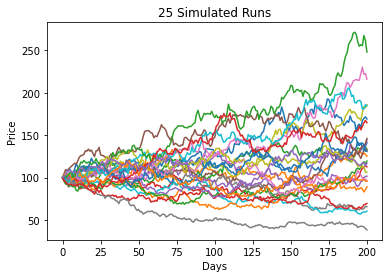

In [6]:
new_list = []
for i in range(25):
    prices = simulate_stock(start=100, rate=0.06, vol=0.4, days=200)
    x = find_yield(run=prices)
    new_list.append(x)
    plt.plot(prices)
    
plt.title("25 Simulated Runs")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

We will now display the yields for these runs using a line plot.

In [7]:
print("Annual Yields for 25 Simulated Runs:")
print(new_list)

Annual Yields for 25 Simulated Runs:
[0.6611, 0.2836, 0.3501, 0.1506, 0.0198, 0.3635, 0.9697, -0.5283, 0.7798, -0.6351, 0.4319, -0.1446, 0.2234, -0.4586, 0.4608, 0.4768, -0.0479, -1.2092, 0.0748, 0.7724, 0.3386, -0.0558, 1.1441, 0.6283, 0.1978]


## Part C: Finding Seeds that Generate Specific Outcomes

In this part, we will use trial and error to find seeds that result in a specific outcome.

In the cell below, Stock A has the highest simulated final price.

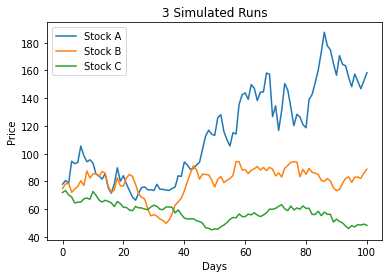

In [8]:
np.random.seed(5)
stock_A = simulate_stock(start=78, rate=0.04, vol=1.2, days=100)
plt.plot(stock_A, label = 'Stock A')

stock_B = simulate_stock(start=75, rate=0.08, vol=0.8, days=100)
plt.plot(stock_B, label = 'Stock B')

stock_C = simulate_stock(start=72, rate=0.12, vol=0.6, days=100)
plt.plot(stock_C, label = 'Stock C')

plt.legend()
plt.title("3 Simulated Runs")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

In the cell below, Stock B has the highest simulated final price.

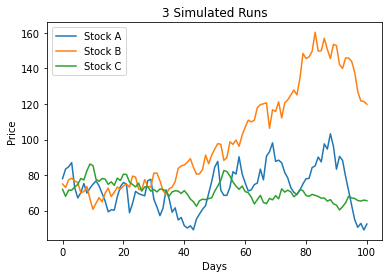

In [9]:
np.random.seed(20)
stock_A = simulate_stock(start=78, rate=0.04, vol=1.2, days=100)
plt.plot(stock_A, label = 'Stock A')

stock_B = simulate_stock(start=75, rate=0.08, vol=0.8, days=100)
plt.plot(stock_B, label = 'Stock B')

stock_C = simulate_stock(start=72, rate=0.12, vol=0.6, days=100)
plt.plot(stock_C, label = 'Stock C')

plt.legend()
plt.title("3 Simulated Runs")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

In the cell below, Stock C has the highest simulated final price.

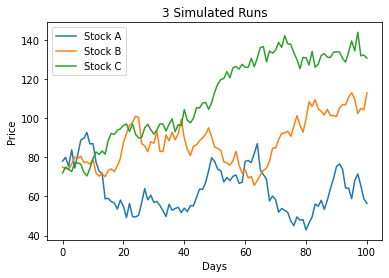

In [10]:
np.random.seed(110)
stock_A = simulate_stock(start=78, rate=0.04, vol=1.2, days=100)
plt.plot(stock_A, label = 'Stock A')

stock_B = simulate_stock(start=75, rate=0.08, vol=0.8, days=100)
plt.plot(stock_B, label = 'Stock B')

stock_C = simulate_stock(start=72, rate=0.12, vol=0.6, days=100)
plt.plot(stock_C, label = 'Stock C')

plt.legend()
plt.title("3 Simulated Runs")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

## Part D: Monte Carlo Simulation

In this part, we will run several simulations to estimate the probabilities of the outcomes of certain events are.

In [11]:
def monte_carlo(start, rate, vol, days, num_runs):
    final_prices = []
    annual_yields = []

    for i in range(num_runs):
        daily_returns = np.random.normal(rate/days, vol/np.sqrt(days), days)
        price = start * np.exp(np.cumsum(daily_returns))
        final_prices.append(price[-1])
        annual_yields.append((price[-1]/start)**(365/days)-1)

    return np.array(final_prices), np.array(annual_yields)
        

We will now test the Monte Carlo function with a seed of 1.

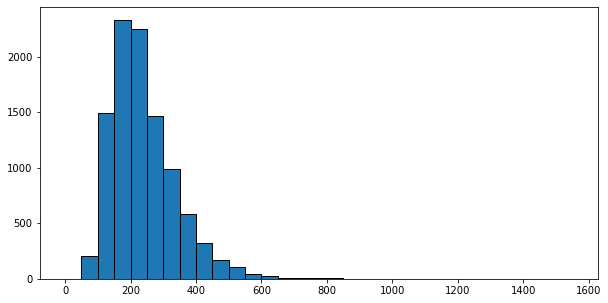

In [12]:
np.random.seed(1)

start = 200
rate = 0.1
vol = 0.4
days = 500
num_runs = 10000

final_prices, _ = monte_carlo(start, rate, vol, days, num_runs)

bins = np.arange(0, 1600, 50)
plt.figure(figsize=(10, 5))
plt.hist(final_prices, bins=bins, edgecolor='black')
plt.show()

We will now display the 10th, 25th, 50th, 75th, and 90th percentiles.

In [13]:
print(f"10th percentile: {np.percentile(final_prices, 10):.2f}")
print(f"25th percentile: {np.percentile(final_prices, 25):.2f}")
print(f"50th percentile: {np.percentile(final_prices, 50):.2f}")
print(f"75th percentile: {np.percentile(final_prices, 75):.2f}")
print(f"90th percentile: {np.percentile(final_prices, 90):.2f}")

10th percentile: 132.05
25th percentile: 167.90
50th percentile: 220.43
75th percentile: 290.01
90th percentile: 371.04


## Part E: Effects of Volatility

In this part, we will do two Monte Carlo simulations with different volatilities to find the effect of volatility on simulated stock prices.

In [14]:
np.random.seed(1)

start_price = 100
expected_return = 0.12
days = 150
num_runs = 10000

final_prices_A, annual_yields_A = monte_carlo(start_price, expected_return, 0.3, days, num_runs)
final_prices_B, annual_yields_B = monte_carlo(start_price, expected_return, 0.7, days, num_runs)

average_yield_A = np.mean(annual_yields_A)
average_yield_B = np.mean(annual_yields_B)

print(f"Average Annual Yield for A over 10000 runs: {average_yield_A:.4f}")
print(f"Average Annual Yield for B over 10000 runs: {average_yield_B:.4f}")

Average Annual Yield for A over 10000 runs: 0.7513
Average Annual Yield for B over 10000 runs: 4.6352


We will now create two histograms of the final prices to inspect the results of these simulations.

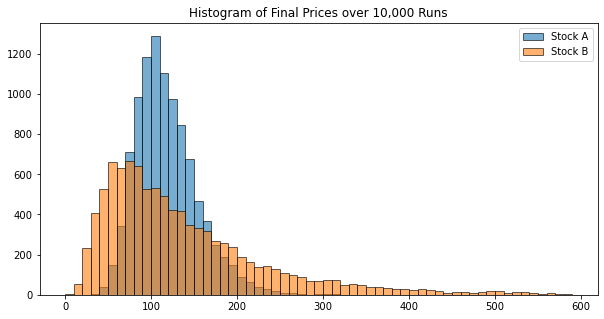

In [15]:
plt.figure(figsize=(10,5))
plt.hist(final_prices_A, bins=np.arange(0, 600, 10), alpha=0.6, edgecolor='black', label='Stock A')
plt.hist(final_prices_B, bins=np.arange(0, 600, 10), alpha=0.6, edgecolor='black', label='Stock B')
plt.legend()
plt.title('Histogram of Final Prices over 10,000 Runs')
plt.show()

## Part F: Comparing Two Stocks

In this part, we will estimate probabilities of performance of two stocks with different parameters.

In [16]:
np.random.seed(1)

returns_A = monte_carlo(120, 0.08, 0.2, 252, 10000)
returns_B = monte_carlo(120, 0.05, 0.5, 252, 10000)
print(returns_A)
print(returns_B)

(array([164.12621548, 139.25109811, 140.9363991 , ..., 203.70552768,
       116.68678118, 114.72209708]), array([ 0.57390806,  0.2404882 ,  0.26229229, ...,  1.15216952,
       -0.03974207, -0.06307147]))
(array([ 86.68375831, 172.98875458, 120.72995608, ..., 166.6595839 ,
       467.26406939,  73.86587168]), array([-0.37566008,  0.69848215,  0.00882265, ...,  0.60921729,
        6.16333961, -0.50481755]))


In [17]:
final_price_A, yield_A = returns_A
final_price_B, yield_B = returns_B

total1 = 0
total2 = 0
total3 = 0
total4 = 0
total5 = 0

for i in range(10000):
    if (final_price_A[i] > final_price_B[i]):
        total1 += 1
    if final_price_A[i] > 150:
        total2 += 1
    if final_price_B[i] > 150:
        total3 += 1
    if final_price_A[i] < 100:
        total4 += 1
    if final_price_B[i] < 100:
        total5 += 1

        
print("Proportions of runs in which...")
print("--------------------------------")
print("A ends above B:", round(total1 / 10000, 4))

print("\nA ends above 150:", round(total2 / 10000, 4))
print("B ends above 150:", round(total3 / 10000, 4))
print("\nA ends below 100:", round(total4 / 10000, 4))
print("B ends below 100:", round(total5 / 100000, 4))


Proportions of runs in which...
--------------------------------
A ends above B: 0.5206

A ends above 150: 0.2338
B ends above 150: 0.362

A ends below 100: 0.0951
B ends below 100: 0.0319


## Part G: Expected Call Payoff

In this part, we will use a simulation of our Monte Carlo function to find the expected call payoff.

In [18]:
np.random.seed(1)
start_price = 200
strike_price = 225
expected_yield = 0.11
volatility = 0.4
days_to_expiry = 150
num_runs = 10000

final_prices, _ = monte_carlo(start_price, expected_yield, volatility, days_to_expiry, num_runs)
call_payoffs = np.maximum(final_prices - strike_price, 0)
average_call_payoff = np.mean(call_payoffs)

print(f"Expected call payoff: ${average_call_payoff:.2f}")

Expected call payoff: $46.15
